### [KBO 타자 ops 예측]
#### OPS: 장타율(타수에서 기대되는 평균 루타)+출루율
#### description: 2019년 타자들의 상반기 OPS를 예측하는 모델을 만들어 주세요. 2010년부터 1군 엔트리에 1번이상 포함 되었던 타자들의 역대 정규시즌, 시범경기 성적 정보를 제공합니다. 
1.1 탐색적 데이터 분석


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['font.family']='Malgun Gothic'

### [제공 자료]
약 350명의 타자들의 시즌별 성적, 생년월일, 몸무게, 키 등의 정보가 제공됩니다.
- KBO기록실(https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx)과 같은 법적인 제약이 없는 외부 데이터의 사용이 가능합니다.

#### [Files]
- ① Regular_Season_Batter.csv : KBO에서 활약한 타자들의 역대 정규시즌 성적을 포함하여 몸무게, 키 ,생년월일 등의 기본정보
- ② Regular_Season_Batter_Day_by_Day.csv: KBO에서 활약한 타자들의 일자 별 정규시즌 성적
- ③ Pre_Season_Batter.csv : KBO에서 활약한 타자들의 역대 시범경기(정규시즌 직전에 여는 연습경기) 성적
- ④ submission.csv : 참가자들이 예측해야 할 타자의 이름과 아이디 목록

### [자료 정보]
#### Pre/Regular_Season_Batter
- batter_id: 타자의 고유 아이디
- batter_name: 타자 이름
- year: 년도
- team: 소속팀
- avg: 타율
- G: 출전게임수
- AB: 타수(타석-볼넷-사구-희생번트-희생플라이)
- R: 득점
- H: 안타(1루타+2루타+3루타+홈런)
- 2B: 2루타
- 3B: 3루타
- HR: 홈런
- TB: 루타 수
- RBI: 타점
- SB: 도루 성공
- CS: 도루 실패
- BB: 볼넷
- HBP: 사구(몸에 맞는 볼)
- SO: 삼진아웃
- GDP: 병살타
- SLG: 장타율
- OBP: 출루율
- E: 에러
- height/weight: 선수의 키/몸무게
- year_born: 선수의 생년월일
- position: 선수의 수비위치
- career: 선수의 커리어
- starting_salary: 선수의 한국프로야구 입단연봉
- OPS: OPS(OBP+SLG) 출루율+장타율
### [EDA를 통한 프리시즌 데이터를 예측모델에 사용했는지의 여부 확인]
- 야구 용어 정리
- https://sites.google.com/site/eveningglow17/record/yagu-yong-eo-jeongli

In [4]:
pre_df=pd.read_csv('./data/Pre_Season_Batter.csv')
reg_df=pd.read_csv('./data/Regular_Season_Batter.csv')
display(pre_df.head())


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [6]:
#Pre_Season_Batter.csv 의 정보 확인하기
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

In [5]:
reg_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [8]:
#Regular_Season_Batter의 정보 확인하기
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

In [11]:
# 데이터 요약
pre_df.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


<AxesSubplot:>

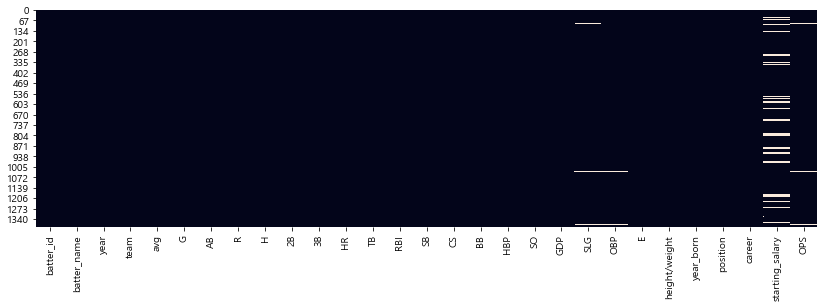

In [14]:
#결측치 시각화
plt.rcParams['figure.figsize']=(14,4)
sns.heatmap(pre_df.isnull(),cbar=False)



In [17]:
# Pre_Season_Batter.csv의 결측치 갯수 확인
pre_df.isnull().sum()

batter_id            0
batter_name          0
year                 0
team                 0
avg                  0
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                 29
OBP                 25
E                    0
height/weight        0
year_born            0
position             0
career               0
starting_salary    214
OPS                 29
dtype: int64

# 수치형 데이터 분포도 확인
- 히스토그램 이용

                                         -----------프리 시즌-----------


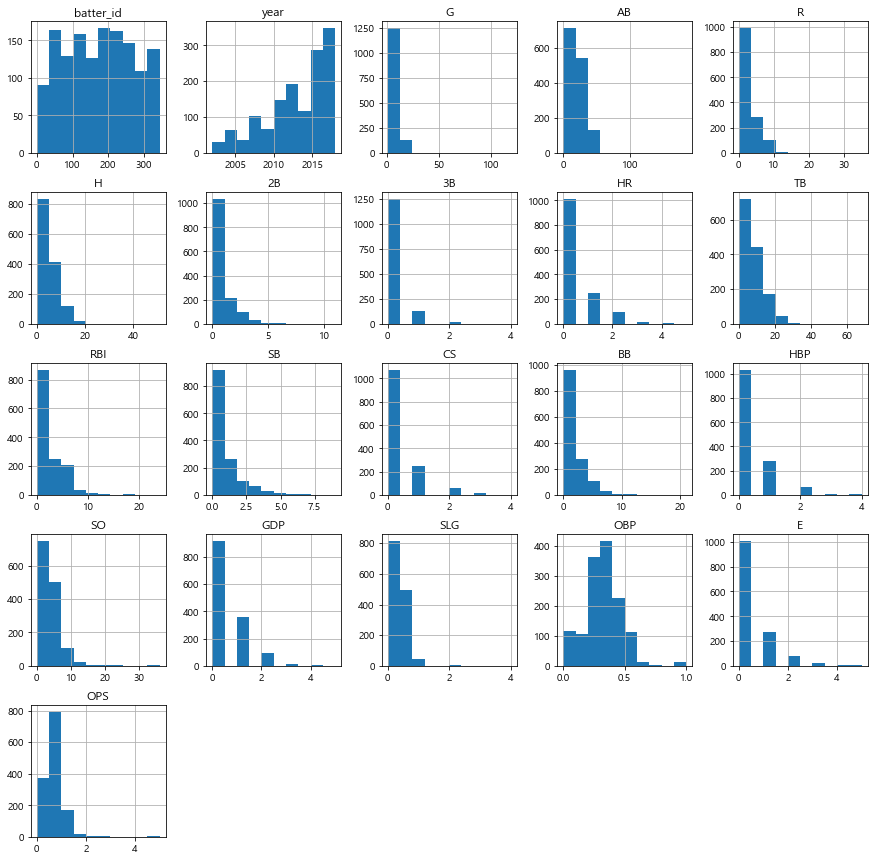

                                           -----------정규 시즌-----------


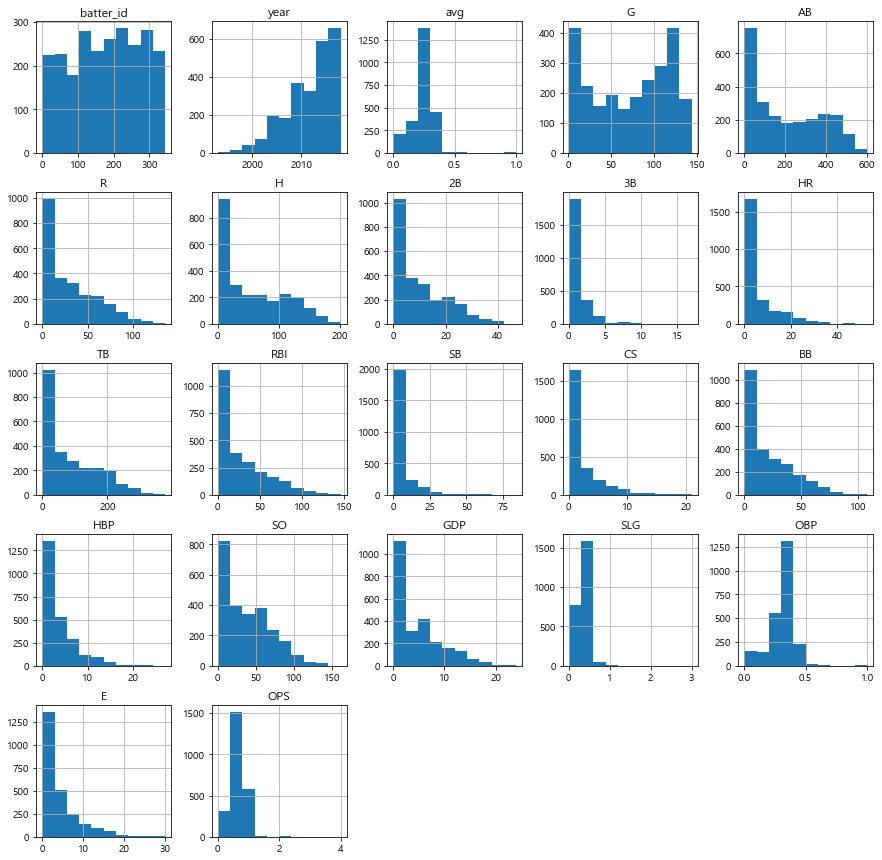

In [22]:
#[분석1] 프리시즌의 자료
print('                                         -----------프리 시즌-----------')
pre_df.hist(figsize=(15,15))
plt.show()
print('                                           -----------정규 시즌-----------')
reg_df.hist(figsize=(15,15))
plt.show()

#### [분석2]
- 프리시즌데이터에 있는 선수가 정규시즌 데이터에 있어서 프리시즌이 분석가치가 있는가?
- 그해의 정규시즌의 선수리스트 자료와 프리시즌 선수리스트의 자료의 교집합이 있는가?
- 교집합의 총 인원수를 알려주세요

In [61]:
reg_df['bigo']=reg_df['year'].apply(str)+reg_df['batter_name']
pre_df['bigo']=pre_df['year'].apply(str)+pre_df['batter_name']


In [62]:
# 교집합 만들기

rp_df=list(set(reg_df['bigo']).intersection(pre_df['bigo']))

In [65]:
# 교집합에 존재하는 데이터만 불러오기
re_new=reg_df.loc[reUnique['bigo'].apply(lambda x:x in rp_df)].copy()
re_new=re_new.sort_values(by='bigo').reset_index(drop=True)

pre_new=pre_df.loc[preUnique['bigo'].apply(lambda x:x in rp_df)].copy()
pre_new=pre_new.sort_values(by='bigo').reset_index(drop=True)

# 검정 코드
print(re_new.shape,pre_new.shape)
sum(re_new['bigo']==pre_new['bigo'])


(1358, 30) (1358, 30)


1358


### [분석3]
- 프리시즌의 성적 데이터를 분석데이터에 넣을 것인가를 분석 2 
- 프리시즌 데이터와 정규시즌 데이터간의 상관도는 있는가?
- 프리시즌 성적과 정규시즌 성적이 동일한 패턴인가? (OPS값이)

- 전제조건, 년도와 이름으로 조인한 새로운 자료에서 작업해야 한다.
- 결과가 0.15가 나오면 맞음(작업)

- 결과: 프리시즌 자료는 예측에 사용하지 않는다.

In [81]:
# 정규시즌과 프리시즌의 상관관계 계산
#상관관계 중 'pearson'의 상관관계 함수를 사용

# (-1 : 음의 상관관계 / 0 : 상관없음 / 1 : 양의 상관관계)
correlation=re_new['OPS'].corr(pre_new['OPS'])
correlation

0.14872584643104406

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


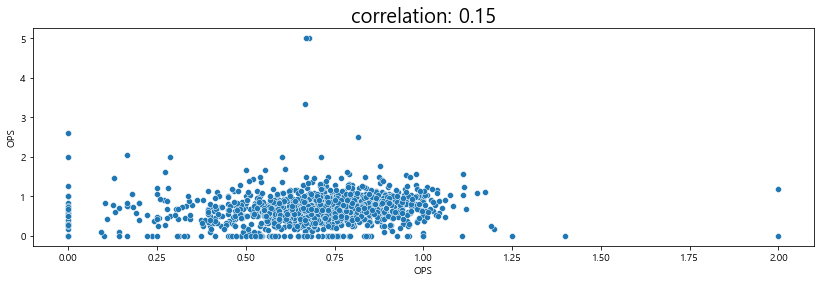

In [79]:
sns.scatterplot(re_new['OPS'],pre_new['OPS'])
plt.title('correlation: '+str(np.round(correlation,2)),fontsize=20)
plt.xlabel=('regular OPS')
plt.ylabel=('pre OPS')
plt.show()

### [Conclusion]
- 정규시즌과 프리시즌의 상관관계 결과 0.15의 값을 얻음
- 이것으로 봤을때 정규시즌과 프리시즌의 기록은 서로 관련이 없다는 것을 알 수 있다.
    - 프리시즌 데이터의 경우 경기의 기록 수가 매우 정어 정규시즌 데이터와 차이가 있을 수 있다.

